# Read and process domain/fault outputs
Last modification: 2023.07.17. </br>
Update note: Created

# Initiation

In [1]:
import numpy as np
import matplotlib.pylab as plt
import myplots
from read_outputs import *

mp = myplots.Figpref()

# prefix = 'Thakur20_various_fractal_profiles/v6_Dc2_DZ_long'
prefix = 'scaling_test'
save_dir = 'models/'+prefix
compute_and_save = 1

# Read vtu files and save variables

In [2]:
if compute_and_save:
    read_fault_output(save_dir,save_on=True)
else:
    outputs = load_fault_outputs(save_dir)

Load saved data: models/scaling_test/fault_outputs.npy


In [6]:
sliprate = outputs.item().get('sliprate')
slip = outputs.item().get('slip')
shearT = outputs.item().get('shearT')
normalT = outputs.item().get('normalT')
state_var = outputs.item().get('state_var')
time = outputs.item().get('time')
dep = outputs.item().get('dep')

(948, 6720) (948, 6720)


In [32]:
time = read_pvd('%s/outputs/fault.pvd'%(save_dir))

In [33]:
print(sliprate.shape,time.shape,dep.shape)

(948, 6720) (948,) (948, 6720)


In [34]:
new_outputs = np.array([np.vstack((time,sliprate.T[dp],slip.T[dp])).T for dp in range(dep.shape[1])])
# new_outputs = np.array([sliprate.T,slip.T])
# new_outputs = np.hstack((sliprate.T,slip.T))
new_outputs.shape

(6720, 948, 3)

In [25]:
np.vstack((sliprate.T[0],slip.T[0])).shape

(2, 948)

In [19]:
fpoutputs,fpdep = load_fault_probe_outputs(save_dir)
fpoutputs.shape

Load saved data: models/scaling_test/outputs.npy
Load saved data: models/scaling_test/outputs_depthinfo.npy


(83, 9538, 6)

# Plot a variable

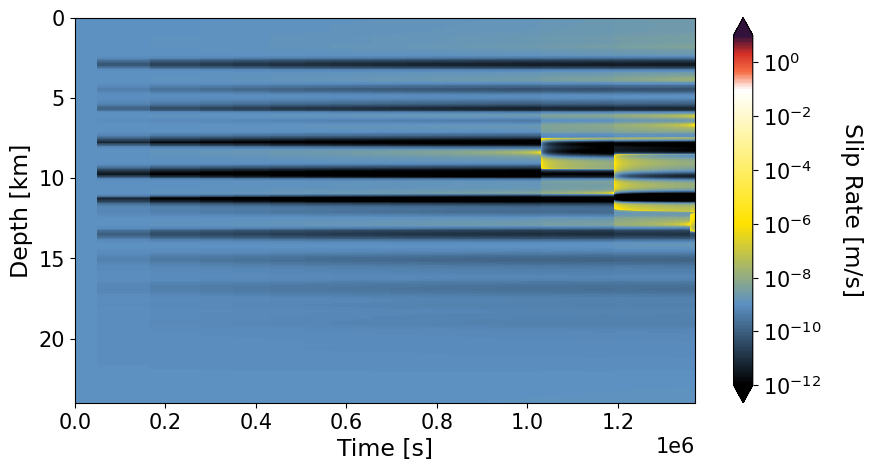

In [49]:
from faultoutputs_image import gen_cmap
import matplotlib as mpl

vmin = 1e-12; vmax=1e1; Vths=1e-1
cmap_n,cb_label = gen_cmap('sliprate',None,vmin,vmax,Vths)
X=np.array([time for it in range(pts.shape[1])])
Y=-pts.T

plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(10,5))
cb = plt.pcolormesh(X,Y,sliprate.T,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
plt.colorbar(extend='both').set_label('Slip Rate [m/s]',fontsize=17,rotation=270,labelpad=30)
plt.xlim(X[0].min(),X[0].max())
plt.gca().invert_yaxis()
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.show()

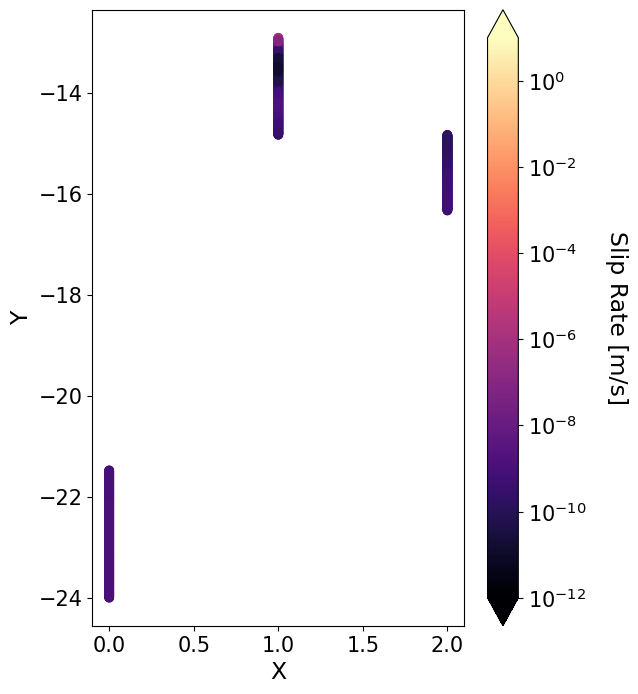

In [96]:
import matplotlib as mpl

vmin = 1e-12; vmax=1e1
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(6,8))
[plt.scatter(k*np.ones(len(sliprate[k])),pts[k][:,1],c=sliprate[k],cmap='magma',norm=mpl.colors.LogNorm(vmin,vmax)) for k in range(3)]
# plt.scatter(np.ones(len(sliprate[1])),pts[1][:,1],c=sliprate[1],cmap='magma',norm=mpl.colors.LogNorm(vmin,vmax))
# cb=plt.scatter(2*np.ones(len(sliprate[2])),pts[2][:,1],c=sliprate[2],cmap='magma',norm=mpl.colors.LogNorm(vmin,vmax))
# plt.colorbar(cb,extend='both').set_label('Slip Rate [m/s]',fontsize=17,rotation=270,labelpad=30)
plt.colorbar(extend='both').set_label('Slip Rate [m/s]',fontsize=17,rotation=270,labelpad=30)
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.show()

In [ ]:
import matplotlib as mpl

vmin = 1e-12; vmax=1e1
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(6,8))
cb=plt.scatter(np.round(pts[:,0]),pts[:,1],c=sliprate,cmap='magma',norm=mpl.colors.LogNorm(vmin,vmax))
plt.colorbar(cb,extend='both').set_label('Slip Rate [m/s]',fontsize=17,rotation=270,labelpad=30)
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.show()

In [91]:
add = int(16)
print(np.sort(fouts)[16:32])

['models/scaling_test/fault/fault_0_0.vtu'
 'models/scaling_test/fault/fault_0_1.vtu'
 'models/scaling_test/fault/fault_0_10.vtu'
 'models/scaling_test/fault/fault_0_11.vtu'
 'models/scaling_test/fault/fault_0_12.vtu'
 'models/scaling_test/fault/fault_0_13.vtu'
 'models/scaling_test/fault/fault_0_14.vtu'
 'models/scaling_test/fault/fault_0_15.vtu'
 'models/scaling_test/fault/fault_0_2.vtu'
 'models/scaling_test/fault/fault_0_3.vtu'
 'models/scaling_test/fault/fault_0_4.vtu'
 'models/scaling_test/fault/fault_0_5.vtu'
 'models/scaling_test/fault/fault_0_6.vtu'
 'models/scaling_test/fault/fault_0_7.vtu'
 'models/scaling_test/fault/fault_0_8.vtu'
 'models/scaling_test/fault/fault_0_9.vtu']
